In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
#%matplotlib inline

In [107]:
rs = 2 #10

# Load a dataset

In [108]:
# import a dataset
df = pd.read_csv("./task/training.csv")

# Exploratory Data Analysis (EDA)

In [109]:
type(df)

pandas.core.frame.DataFrame

In [110]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
34,7.6,3.0,6.6,2.1,0
27,5.6,3.0,4.5,1.5,1
63,6.2,3.4,5.4,2.3,0
59,5.4,3.0,4.5,1.5,1
10,5.7,2.8,4.5,1.3,1


In [111]:
df.shape

(64, 5)

In [112]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [113]:
df['target'].value_counts()

0    37
1    27
Name: target, dtype: int64

In [114]:
df.describe(exclude=['int64'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,64.000000,64.000000,64.000000,64.000000
mean,6.293750,2.906250,5.025000,1.746875
std,0.676094,0.303354,0.794825,0.433139
min,4.900000,2.200000,3.300000,1.000000
25%,5.700000,2.700000,4.475000,1.400000
50%,6.300000,2.950000,5.100000,1.800000
75%,6.700000,3.025000,5.600000,2.100000
max,7.900000,3.800000,6.700000,2.500000


In [115]:
pd.DataFrame(df.groupby(by=['target']).describe()).stack().unstack(0)

sepal length (cm)            sepal width (cm)             \
target                 0          1                0          1   
count          37.000000  27.000000        37.000000  27.000000   
mean            6.545946   5.948148         2.989189   2.792593   
std             0.663574   0.532317         0.314275   0.251038   
min             4.900000   4.900000         2.200000   2.300000   
25%             6.100000   5.600000         2.800000   2.600000   
50%             6.500000   5.700000         3.000000   2.900000   
75%             6.900000   6.350000         3.200000   3.000000   
max             7.900000   7.000000         3.800000   3.200000   

       petal length (cm)            petal width (cm)             
target                 0          1                0          1  
count          37.000000  27.000000        37.000000  27.000000  
mean            5.559459   4.292593         2.051351   1.329630  
std             0.507970   0.458195         0.279505   0.183586  
min             4.500000   3.300000         1.400000   1.000000  
25%             5.100000   4.000000         1.900000   1.250000  
50%             5.600000   4.400000         2.000000   1.300000  
75%             5.900000   4.600000         2.300000   1.500000  
max             6.700000   5.100000         2.500000   1.700000

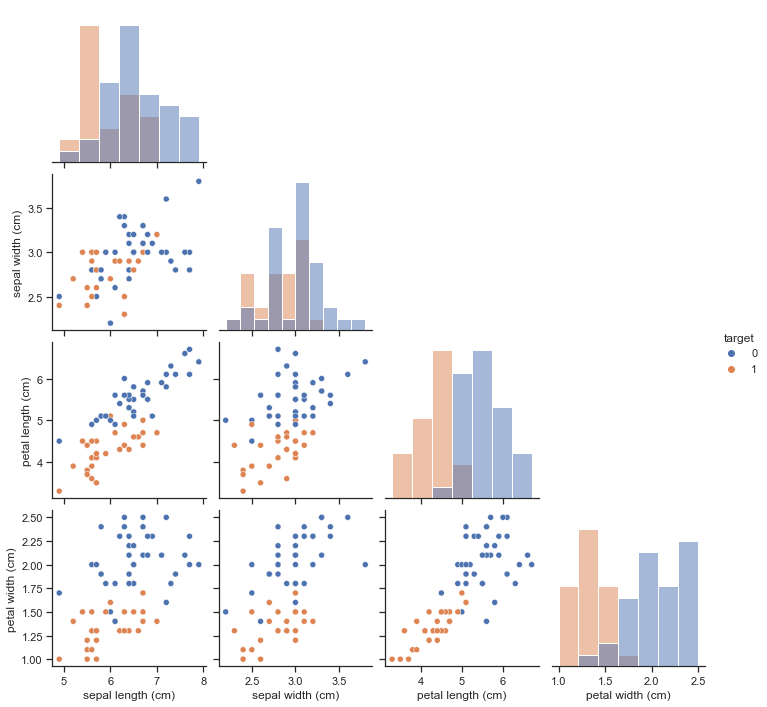

In [116]:
sns.set_theme(style="ticks")
sns.pairplot(df, corner=True, diag_kind="hist", hue="target")

# Training

### Training dataset

In [117]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [41]:
#X = df.iloc[:,0:2] #X = df.iloc[:,:-1] #X = df.iloc[:,2:4]
X = df.iloc[:,[2,3]]
y = df.iloc[:,-1]

### Normalization

#### Min-Max Normalization

In [93]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X) 
print(scaler.data_min_)
print(scaler.data_max_)
X_scaled = scaler.transform(X) 
#print(X_scaled)

[4.9 2.2]
[7.9 3.8]


In [15]:
# scaled 
print('(scaled) max: ', X_scaled.max(axis=0))
print('(scaled) min: ', X_scaled.min(axis=0))

(scaled) max:  [1. 1.]
(scaled) min:  [0. 0.]


#### Z-score Normalization

In [118]:
scaler = StandardScaler().fit(X) 
print(scaler.mean_)
print(np.sqrt(scaler.var_))
X_scaled = scaler.transform(X)

[6.29375 2.90625]
[0.67079128 0.30097498]


In [119]:
# scaled 
print('(scaled) mean: ', np.round(X_scaled.mean(axis=0),5))
print('(scaled) sd: ', X_scaled.std(axis=0))

(scaled) mean:  [ 0. -0.]
(scaled) sd:  [1. 1.]


### Splitting dataset

In [120]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=rs)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.4, random_state=rs)

In [122]:
X_train.shape

(38, 2)

In [123]:
y_train.value_counts()

0    20
1    18
Name: target, dtype: int64

In [124]:
X_test.shape

(26, 2)

In [125]:
y_test.value_counts()

0    17
1     9
Name: target, dtype: int64

### Perceptron learning

In [126]:
# initialization
model_per = Perceptron()
# optimization
model_per.fit(X_train, y_train)

Perceptron()

In [127]:
# training: performance
y_pred_train = model_per.predict(X_train)
print(np.round(metrics.accuracy_score(y_pred_train, y_train),5))

0.55263


In [128]:
# testing: performance
y_pred_test = model_per.predict(X_test)
print(np.round(metrics.accuracy_score(y_pred_test, y_test),5))

0.76923


### Decision boundary

In [129]:
w = model_per.coef_[0]
#print(w)

In [130]:
w0 = model_per.intercept_
#print(w0)

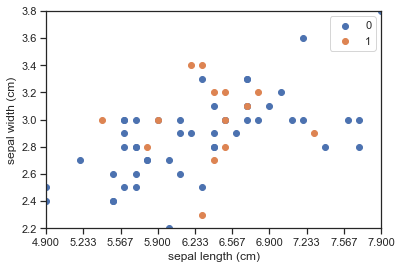

In [131]:
if len(w) == 2:
    x_ticks = np.linspace(min(X.iloc[:,0]),max(X.iloc[:,0]),10)
    ax = plt.subplot(1,1,1)
    ax.set_xticks(x_ticks)
    ax.set_xlim(min(X.iloc[:,0]),max(X.iloc[:,0]))
    ax.set_ylim(min(X.iloc[:,1]),max(X.iloc[:,1]))
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    plt.scatter(X.iloc[:50,0],X.iloc[:50,1],label='0')
    plt.scatter(X.iloc[50:,0],X.iloc[50:,1],label='1')
    plt.plot(x_ticks, (w[0]*x_ticks + w0)/(-w[1]))
    plt.legend(loc = 'best')

### Scaled

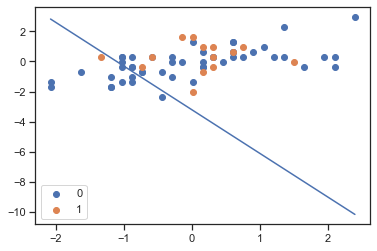

In [132]:
if len(w) == 2:
    x_ticks = np.linspace(min(X_scaled[:,0]),max(X_scaled[:,0]),10)
    ax.set_xticks(x_ticks)
    ax.set_xlim(min(X_scaled[:,0]),max(X_scaled[:,0]))
    ax.set_ylim(min(X_scaled[:,1]),max(X_scaled[:,1]))
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    plt.scatter(X_scaled[:50,0],X_scaled[:50,1],label='0')
    plt.scatter(X_scaled[50:,0],X_scaled[50:,1],label='1')
    plt.plot(x_ticks, (w[0]*x_ticks + w0)/(-w[1]))
    plt.legend(loc = 'best')